# Análisis Predictivo de Costos de Seguros Médicos

**Objetivo:** El propósito de este notebook es explorar un conjunto de datos sobre costos de seguros médicos para entender qué factores influyen más en el precio final. Construiremos desde análisis simples hasta un modelo de regresión múltiple para predecir los costos.

In [1]:
# Cargar la extensión de Kedro para conectar con el proyecto
%load_ext kedro.ipython
%reload_kedro

# Cargar el dataset crudo desde el catálogo de datos
df_raw = catalog.load("raw_medical_data_csv") # type: ignore

# Importar las librerías que usaremos a lo largo del análisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Mostrar las primeras filas para verificar la carga
df_raw.head()

[10/05/25 13:08:36] INFO     Using                                                                  ]8;id=582134;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=90271;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\                
                             Lib\site-packages\kedro\framework\project\rich_logging.yml' as logging                
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=852134;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=109636;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=547425;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=43210;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=860387;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=861177;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress.                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/05/25 13:08:38] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=220304;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=911727;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/05/25 13:08:39] INFO     Kedro project MedicalCost                                              ]8;id=254960;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=81777;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=275434;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=291489;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=55328;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=763350;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

                    INFO     Resolved project path as:                                              ]8;id=653351;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=779946;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress.                      
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=310429;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=421326;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/05/25 13:08:40] INFO     Kedro project MedicalCost                                              ]8;id=748545;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=939854;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=555792;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=770338;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=322991;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=213303;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

                    INFO     Loading data from raw_medical_data_csv (CSVDataset)...            ]8;id=393154;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=706095;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Parte 1: Análisis Exploratorio Univariado

Primero, vamos a investigar cómo cada variable individual se relaciona con los costos del seguro (`charges`). Empezaremos con las variables numéricas más prometedoras: `age` y `bmi`.

### 1.1 ¿Cómo afecta la Edad (`age`) al costo?

Ecuación: charges = 257.72 * age + 3165.89


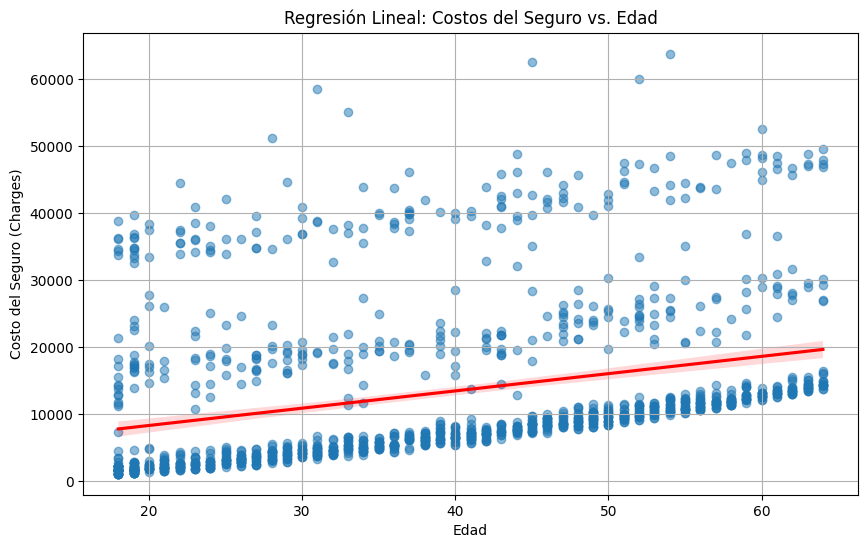

In [2]:
# 1. Preparar los datos
X_age = df_raw[['age']] 
y_age = df_raw['charges']

# 2. Crear y entrenar el modelo
model_age = LinearRegression()
model_age.fit(X_age, y_age)

# 3. Visualizar los datos y la línea de regresión
print(f"Ecuación: charges = {model_age.coef_[0]:.2f} * age + {model_age.intercept_:.2f}")
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df_raw, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title('Regresión Lineal: Costos del Seguro vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Costo del Seguro (Charges)')
plt.grid(True)
plt.show()

**Interpretación:** Se observa una clara tendencia positiva: a mayor edad, mayor es el costo. Sin embargo, los datos parecen agruparse en tres "bandas" distintas. Esto sugiere que hay otro factor muy importante que no estamos considerando.

### 1.2 ¿Cómo afecta el Índice de Masa Corporal (`bmi`) al costo?

Ecuación: charges = 393.87 * bmi + 1192.94


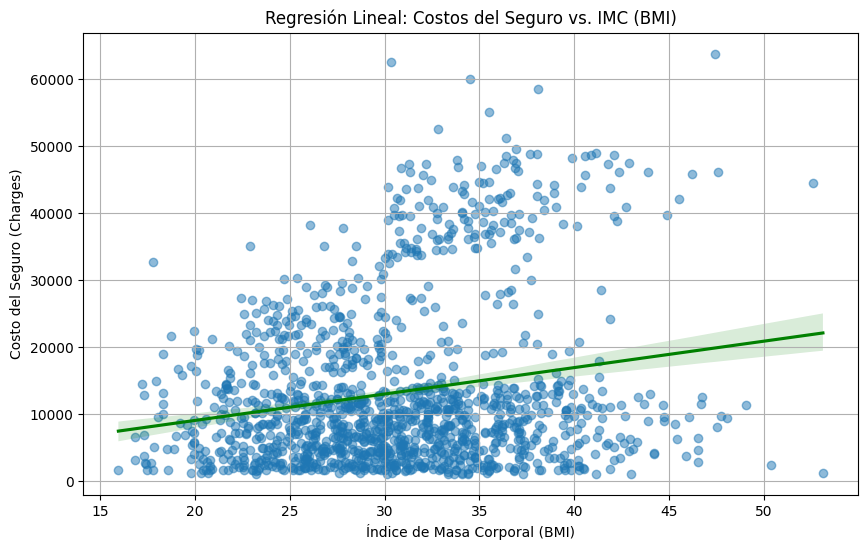

In [3]:
# 1. Preparar los datos
X_bmi = df_raw[['bmi']] 
y_bmi = df_raw['charges']

# 2. Crear y entrenar el modelo
model_bmi = LinearRegression()
model_bmi.fit(X_bmi, y_bmi)

# 3. Visualizar
print(f"Ecuación: charges = {model_bmi.coef_[0]:.2f} * bmi + {model_bmi.intercept_:.2f}")
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df_raw, line_kws={"color": "green"}, scatter_kws={"alpha": 0.5})
plt.title('Regresión Lineal: Costos del Seguro vs. IMC (BMI)')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Costo del Seguro (Charges)')
plt.grid(True)
plt.show()

**Interpretación:** La relación positiva también existe, pero es más débil y los datos están mucho más dispersos. Al igual que con la edad, parece haber una división en los datos que este modelo simple no puede explicar.

### 1.3 El Factor Clave: ¿Ser Fumador (`smoker`) importa?

Los análisis anteriores sugieren un factor oculto. Investiguemos la variable `smoker`, que es categórica. Un diagrama de caja es ideal para esto.

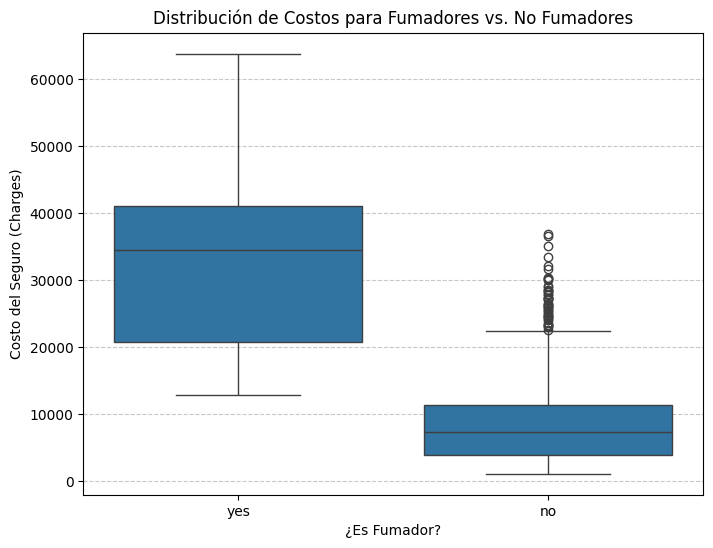

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df_raw)
plt.title('Distribución de Costos para Fumadores vs. No Fumadores')
plt.xlabel('¿Es Fumador?')
plt.ylabel('Costo del Seguro (Charges)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretación:** ¡Este es el hallazgo clave! La diferencia en costos entre fumadores y no fumadores es masiva. Ser fumador no solo eleva el costo promedio, sino que también aumenta la variabilidad. Esto explica las "bandas" que vimos en los gráficos anteriores.

## Parte 2: Análisis de Interacciones y Correlaciones

Ahora que sabemos que `smoker` es crucial, veamos cómo interactúa con otras variables.

### 2.1 Interacción entre IMC, ser Fumador y Costos

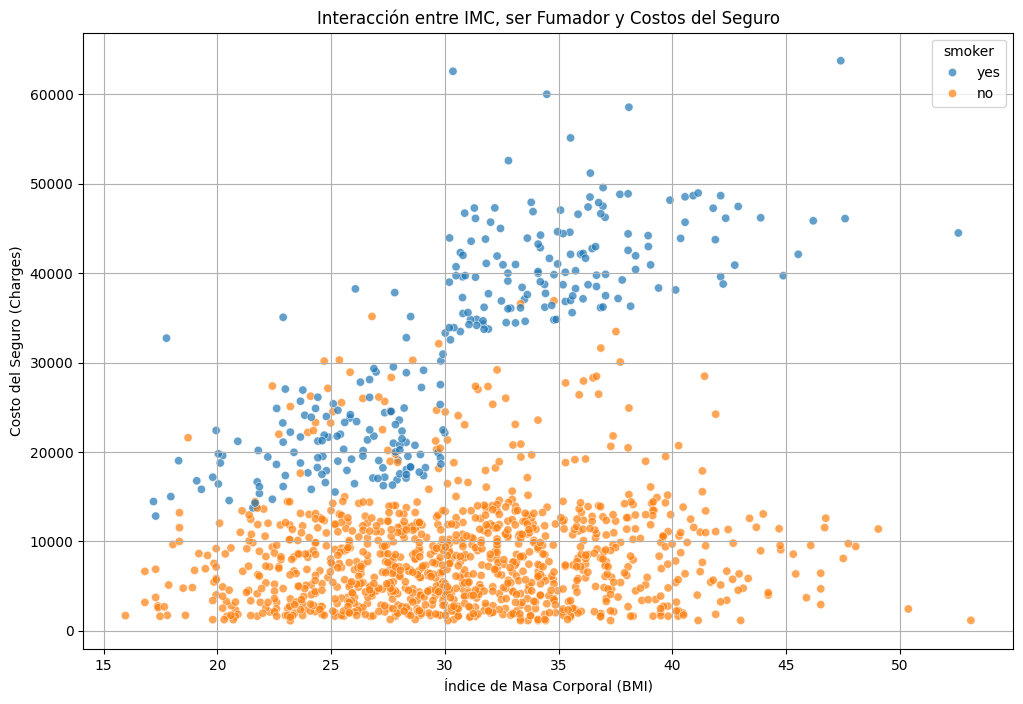

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_raw, alpha=0.7)
plt.title('Interacción entre IMC, ser Fumador y Costos del Seguro')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Costo del Seguro (Charges)')
plt.grid(True)
plt.show()

**Interpretación:** Este gráfico es muy revelador. Para los no fumadores (puntos azules), el IMC tiene un impacto muy leve en el costo. Sin embargo, para los fumadores (puntos naranjas), un IMC más alto está asociado con un aumento drástico en los costos. Esto se conoce como un **efecto de interacción**.

### 2.2 Matriz de Correlación Numérica
Para resumir las relaciones lineales entre todas las variables numéricas, usamos una matriz de correlación.

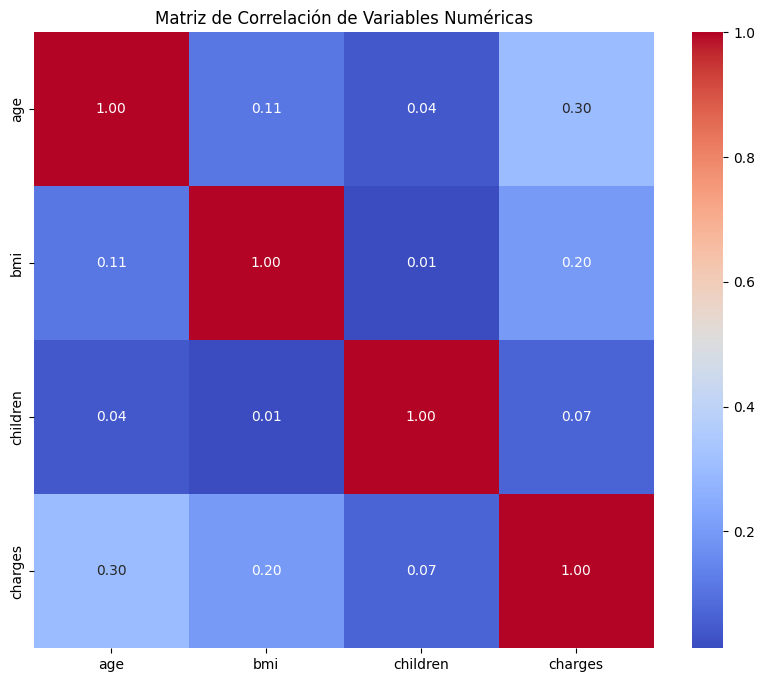

In [6]:
numeric_cols = df_raw.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

**Interpretación:** La matriz confirma nuestras observaciones iniciales: `age` y `bmi` tienen las correlaciones positivas más fuertes con `charges`, aunque siguen siendo débiles por sí solas. Esto refuerza la idea de que un modelo que combine múltiples factores será mucho más potente.

## Parte 3: Construcción de un Modelo Predictivo Completo

Es hora de combinar todo lo que hemos aprendido. Construiremos un modelo de **Regresión Lineal Múltiple** que utilice todas las variables relevantes para predecir los costos.

In [7]:
# --- Preparación de Datos ---
df_model = df_raw.copy()
df_model = pd.get_dummies(df_model, columns=['sex', 'smoker', 'region'], drop_first=True)

# --- Entrenamiento del Modelo ---
X = df_model.drop('charges', axis=1)
y = df_model['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# --- Evaluación del Modelo ---
y_pred = multi_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Precisión del Modelo (R-cuadrado): {r2:.4f}")

# --- Interpretación de Coeficientes ---
print("\nImpacto de cada variable en el costo:")
coeffs = pd.DataFrame(multi_model.coef_, X.columns, columns=['Coeficiente'])
print(coeffs)

Precisión del Modelo (R-cuadrado): 0.7836

Impacto de cada variable en el costo:
                   Coeficiente
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


## Conclusión Final

Nuestro análisis nos ha llevado en un viaje desde simples visualizaciones hasta un modelo predictivo robusto.

1.  **Precisión del Modelo:** Nuestro modelo final puede explicar aproximadamente el **78.4%** de la variabilidad en los costos del seguro (R² = 0.7836), lo cual es un resultado bastante bueno.

2.  **Factores Más Importantes:**
    *   **Ser Fumador (`smoker_yes`) es, por un margen enorme, el factor más determinante.** Aumenta el costo en más de $23,600, manteniendo todo lo demás constante.
    *   La **Edad (`age`)** y el **IMC (`bmi`)** son los siguientes factores más importantes, aumentando el costo en ~$257 y ~$337 por cada unidad, respectivamente.
    *   El número de **hijos (`children`)** también tiene un impacto positivo notable.
    *   El **género (`sex_male`)** y la **región** tienen un impacto mucho menor y, en algunos casos, negativo en comparación con la categoría de referencia (región Noreste).

En resumen, aunque la edad y el IMC son importantes, el hábito de fumar es el principal impulsor de los altos costos de los seguros médicos en este conjunto de datos.